<a href="https://colab.research.google.com/github/hj-22/2025-1-DM_Proj/blob/jiwon/250602_modeling_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv("/content/drive/MyDrive/DM_project/master_final.csv", index_col=0)
data.reset_index(drop=True, inplace=True)
data.head()

,AIRPORT_ID,YEAR,FIVEDAY,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,RESPONSE,WND_mean,CIG_mean,VIS_mean,TMP_mean,...,MIGRATORY_RATIO_1,WATERBIRD_RATIO_1,MIGRATORY_RATIO_2,WATERBIRD_RATIO_2,MIGRATORY_RATIO_3,WATERBIRD_RATIO_3,RESPONSE_LOGIT,TOTAL_FLT,NUM_STRIKE_PREV,NUM_STRIKE
0,KSMF,2009,1,38.69542,-121.59077,0,27.756579,7992.867550,8839.335526,46.900662,...,1.000000,0.024764,0.931034,0.155172,1.000000,0.666667,-11.512915,956,2,0
1,KSMF,2009,2,38.69542,-121.59077,1,16.919753,9841.496894,8086.296296,55.372671,...,0.397106,0.826367,1.000000,0.011771,0.866667,1.000000,-6.834394,939,0,1
2,KSMF,2009,3,38.69542,-121.59077,1,8.697368,18363.801325,8312.572368,60.377483,...,0.981083,0.059662,1.000000,0.902778,0.393939,1.000000,-5.475099,961,1,4
3,KSMF,2009,4,38.69542,-121.59077,1,10.370629,20924.545455,11554.972028,71.188811,...,0.964005,0.318717,0.000000,0.000000,0.000000,0.000000,-5.706291,908,4,3
4,KSMF,2009,5,38.69542,-121.59077,1,22.803797,5344.702532,9327.367089,103.911392,...,1.000000,0.004883,0.000000,0.000000,0.988807,0.137810,-6.809796,916,3,1


<Axes: >

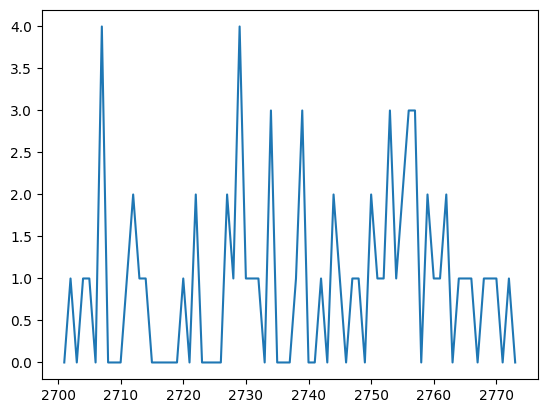

In [ ]:
data[(data["AIRPORT_ID"]=="KLAX") & (data["YEAR"]==2014)]["NUM_STRIKE"].plot()

In [ ]:
data.columns

Index(['AIRPORT_ID', 'YEAR', 'FIVEDAY', 'AIRPORT_LATITUDE',
       'AIRPORT_LONGITUDE', 'RESPONSE', 'WND_mean', 'CIG_mean', 'VIS_mean',
       'TMP_mean', 'DEW_mean', 'SLP_mean', 'RAIN_mean', 'WND_sd', 'CIG_sd',
       'VIS_sd', 'TMP_sd', 'DEW_sd', 'SLP_sd', 'RAIN_sd', 'MIGRATORY_ABUN',
       'RESIDENTIAL_ABUN', 'MIGRATORY_RATIO', 'WATERBIRD_RATIO',
       'MIGRATORY_RATIO_1', 'WATERBIRD_RATIO_1', 'MIGRATORY_RATIO_2',
       'WATERBIRD_RATIO_2', 'MIGRATORY_RATIO_3', 'WATERBIRD_RATIO_3',
       'RESPONSE_LOGIT', 'TOTAL_FLT', 'NUM_STRIKE_PREV', 'NUM_STRIKE'],
      dtype='object')

반응변수 log transformation

<Axes: xlabel='NUM_STRIKE', ylabel='Density'>

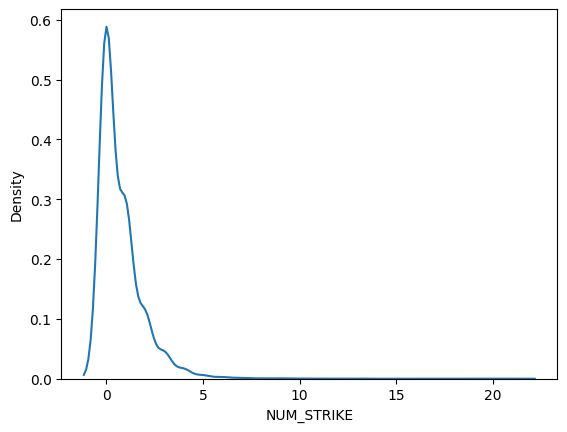

In [ ]:
sns.kdeplot(data["NUM_STRIKE"], bw_adjust=2)

<Axes: xlabel='NUM_STRIKE', ylabel='Density'>

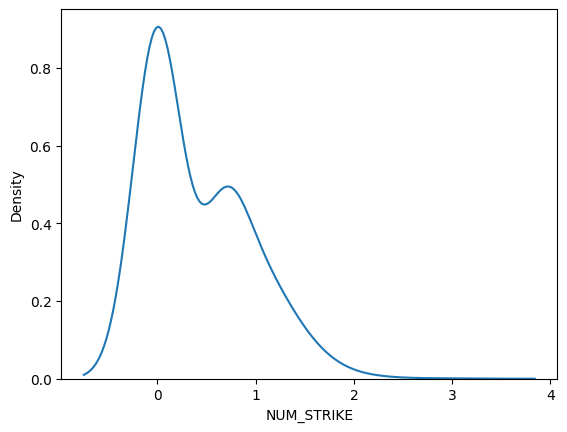

In [ ]:
sns.kdeplot(np.log1p(data["NUM_STRIKE"]), bw_adjust=2) # inverse would be np.expm1()

<Axes: xlabel='MIGRATORY_RATIO', ylabel='Density'>

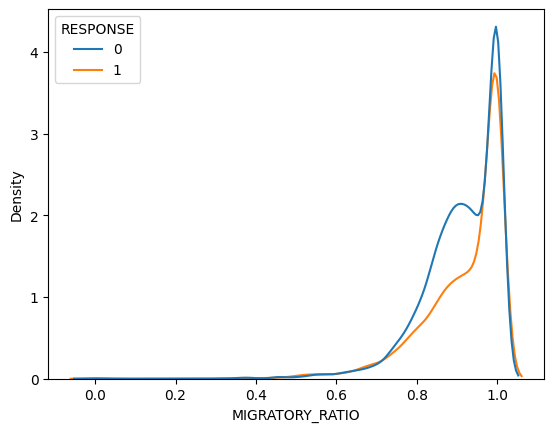

In [ ]:
sns.kdeplot(x="MIGRATORY_RATIO", data=data, hue="RESPONSE")

<Axes: xlabel='WATERBIRD_RATIO', ylabel='Density'>

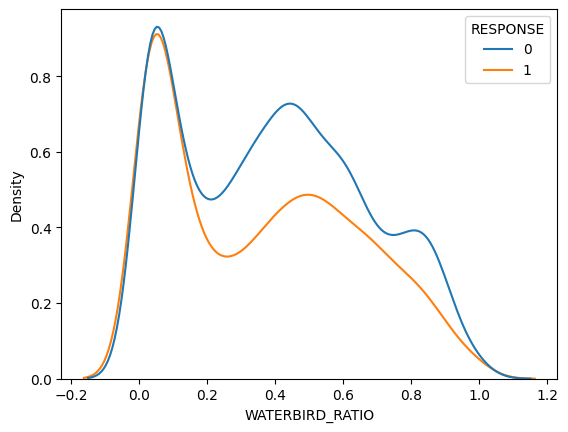

In [ ]:
sns.kdeplot(x="WATERBIRD_RATIO", data=data, hue="RESPONSE")

<Axes: xlabel='MIGRATORY_ABUN', ylabel='Density'>

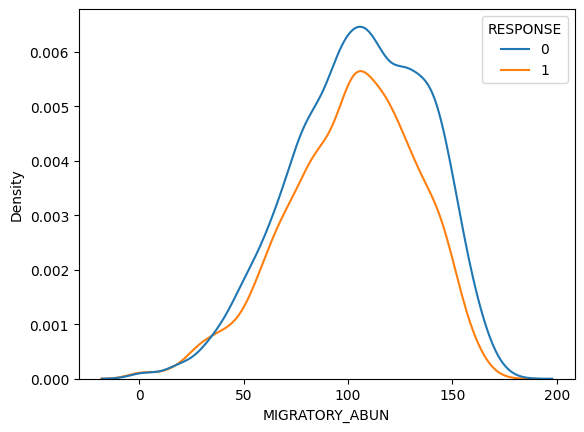

In [ ]:
sns.kdeplot(x="MIGRATORY_ABUN", data=data, hue="RESPONSE")

<Axes: xlabel='RESIDENTIAL_ABUN', ylabel='Density'>

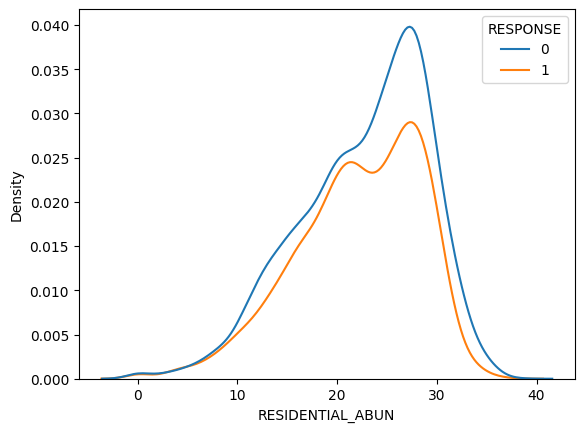

In [ ]:
sns.kdeplot(x="RESIDENTIAL_ABUN", data=data, hue="RESPONSE")

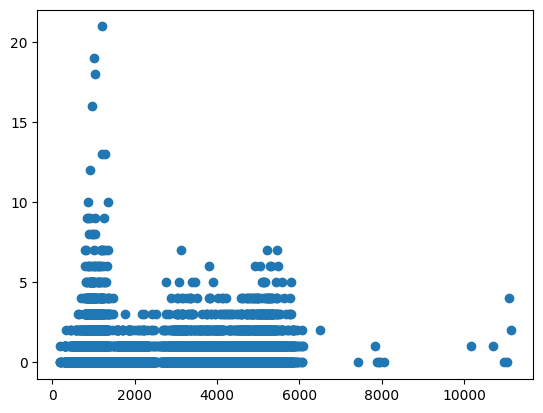

In [ ]:
plt.scatter(data["TOTAL_FLT"], data["NUM_STRIKE"]) # 별 차이 없다

<Axes: xlabel='AIRPORT_ID', ylabel='NUM_STRIKE'>

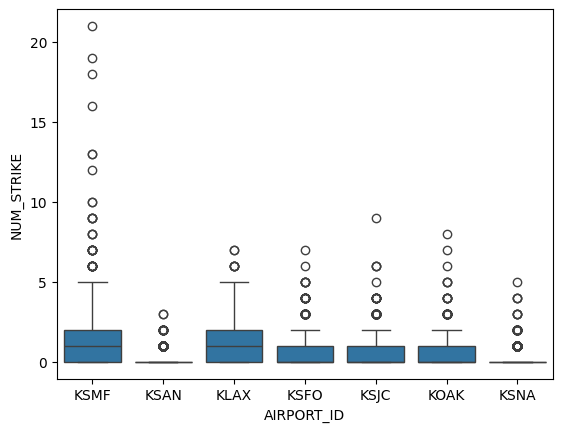

In [ ]:
sns.boxplot(y="NUM_STRIKE", x="AIRPORT_ID", data=data)

<Axes: xlabel='FIVEDAY', ylabel='NUM_STRIKE'>

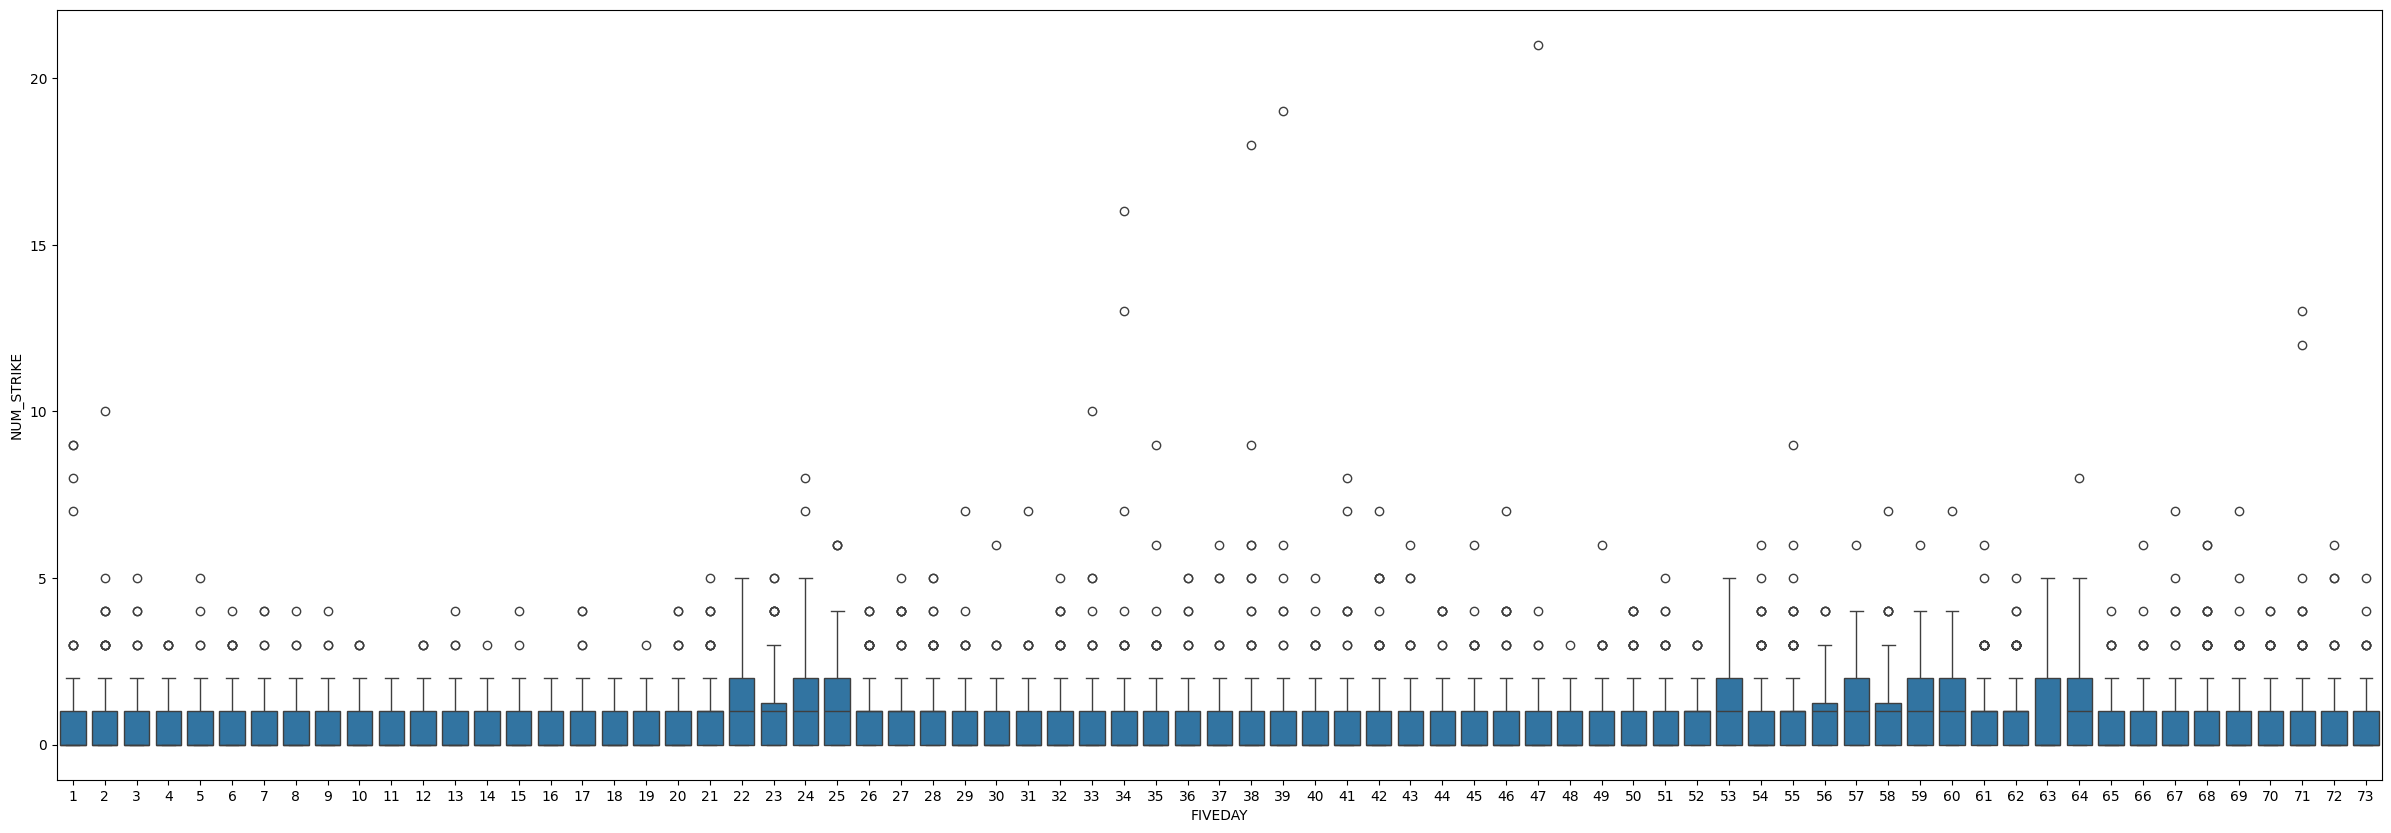

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(y="NUM_STRIKE", x="FIVEDAY", data=data)

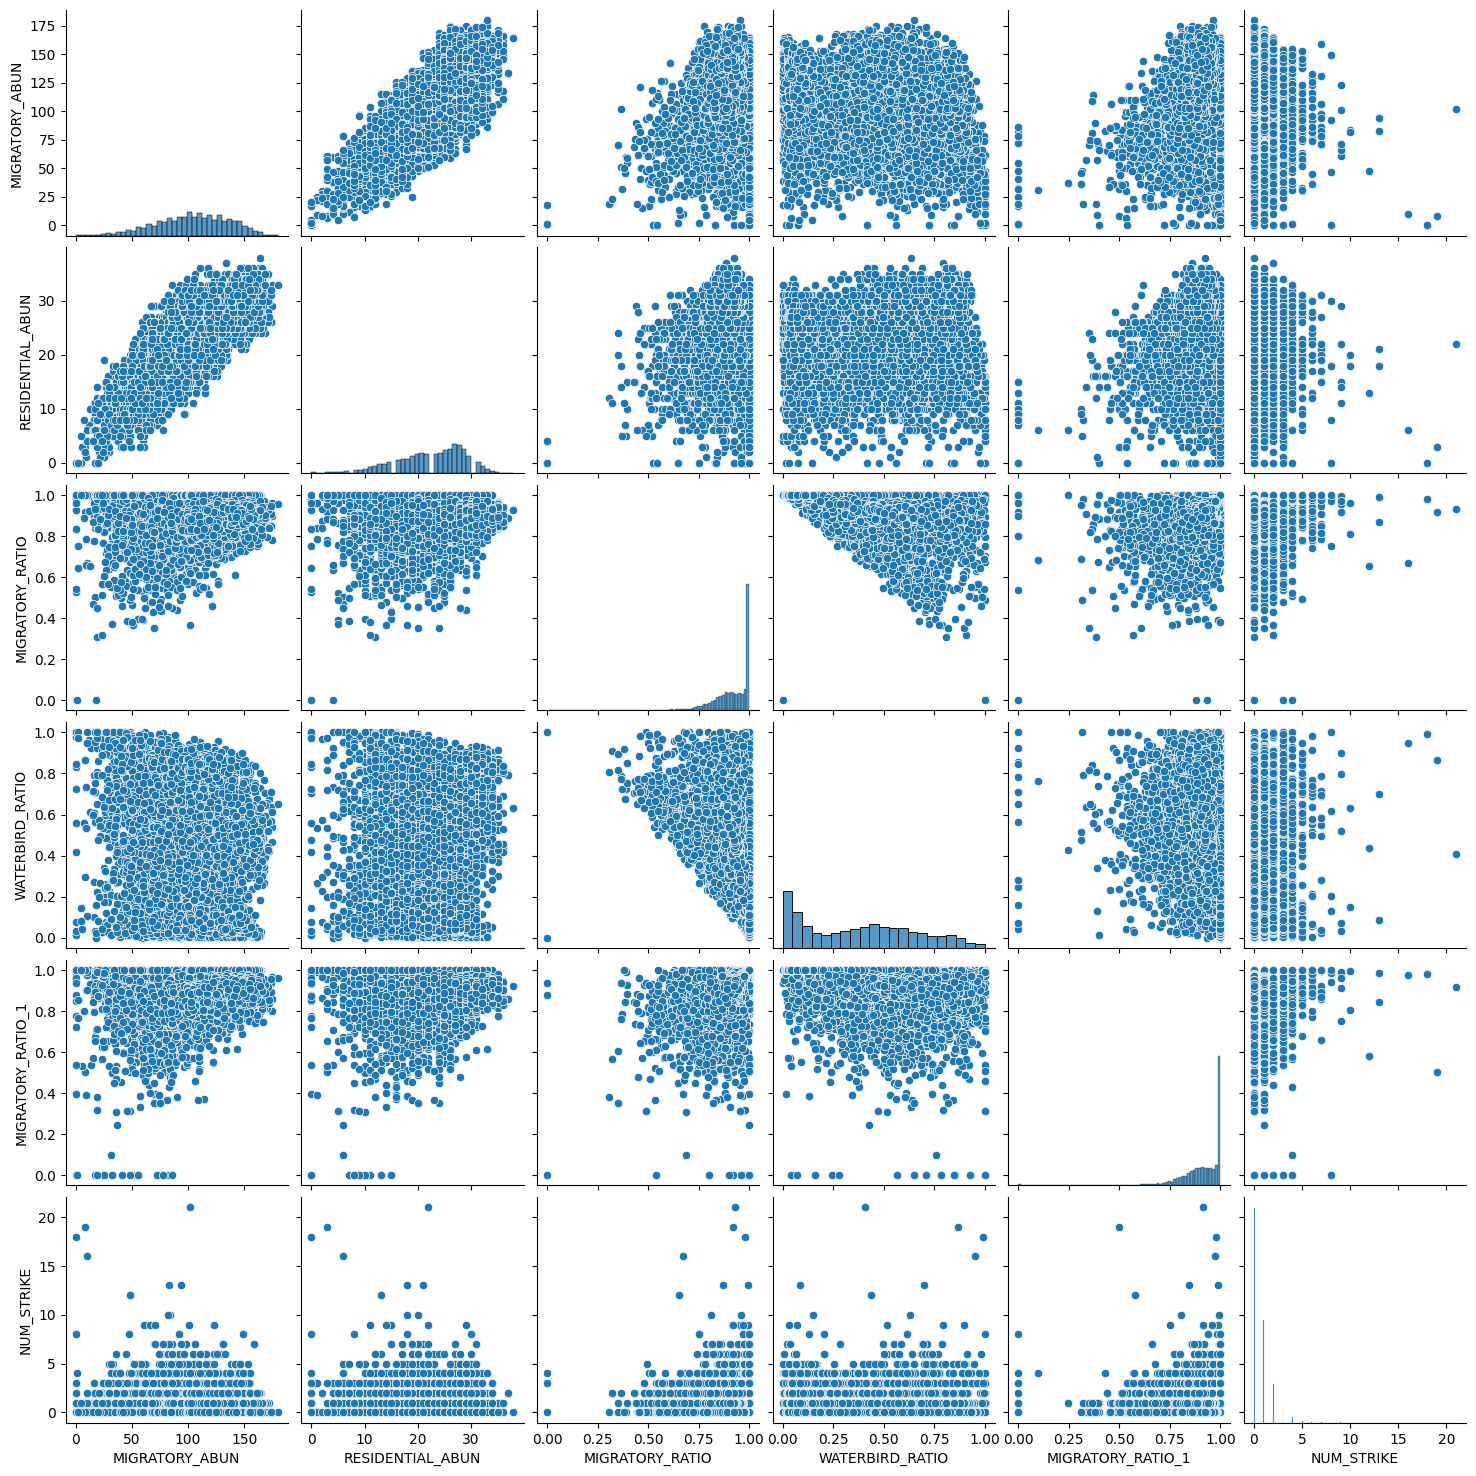

In [ ]:
sns.pairplot(data[['MIGRATORY_ABUN',
       'RESIDENTIAL_ABUN', 'MIGRATORY_RATIO', 'WATERBIRD_RATIO',
       'MIGRATORY_RATIO_1', 'NUM_STRIKE']])

In [10]:
# train test split
train_data = data[data["YEAR"]<=2021]
test_data = data[data["YEAR"]>2021]

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train = train_data.drop(["AIRPORT_ID", "RESPONSE", "RESPONSE_LOGIT", "NUM_STRIKE"], axis=1)
y_train = np.log1p(train_data["NUM_STRIKE"])
X_test = test_data.drop(["AIRPORT_ID", "RESPONSE", "RESPONSE_LOGIT", "NUM_STRIKE"], axis=1)
y_test = np.log1p(test_data["NUM_STRIKE"])

param_RF = {"n_estimators":[200, 250, 300, 325, 350, 375, 400, 500],
            "max_depth":[20, 22, 25, 30, 35],
            "max_features":[1, "sqrt", "log2"]}
rf_model = RandomForestRegressor(random_state=2025)
grid_cv = GridSearchCV(rf_model, param_grid=param_RF, cv=5)
grid_cv.fit(X_train, y_train)
rf_model_final=grid_cv.best_estimator_
y_hat = rf_model_final.predict(X_test)
print(np.sqrt(np.mean((y_hat-y_test)**2)))

0.5212823615635163


In [ ]:
rf_model_final

RandomForestRegressor(max_depth=20, max_features=1, n_estimators=300,
                      random_state=2025)

([<matplotlib.axis.XTick at 0x79f2ad2012d0>,
 [Text(0, 0, 'YEAR'),
  Text(1, 0, 'MIGRATORY_RATIO_3'),
  Text(2, 0, 'MIGRATORY_RATIO_1'),
  Text(3, 0, 'MIGRATORY_RATIO'),
  Text(4, 0, 'MIGRATORY_RATIO_2'),
  Text(5, 0, 'RAIN_sd'),
  Text(6, 0, 'RAIN_mean'),
  Text(7, 0, 'AIRPORT_LONGITUDE'),
  Text(8, 0, 'RESIDENTIAL_ABUN'),
  Text(9, 0, 'VIS_sd'),
  Text(10, 0, 'NUM_STRIKE_PREV'),
  Text(11, 0, 'AIRPORT_LATITUDE'),
  Text(12, 0, 'SLP_sd'),
  Text(13, 0, 'VIS_mean'),
  Text(14, 0, 'WATERBIRD_RATIO_3'),
  Text(15, 0, 'CIG_mean'),
  Text(16, 0, 'DEW_mean'),
  Text(17, 0, 'CIG_sd'),
  Text(18, 0, 'DEW_sd'),
  Text(19, 0, 'WATERBIRD_RATIO_1'),
  Text(20, 0, 'FIVEDAY'),
  Text(21, 0, 'MIGRATORY_ABUN'),
  Text(22, 0, 'WATERBIRD_RATIO_2'),
  Text(23, 0, 'SLP_mean'),
  Text(24, 0, 'WATERBIRD_RATIO'),
  Text(25, 0, 'WND_sd'),
  Text(26, 0, 'TMP_mean'),
  Text(27, 0, 'TMP_sd'),
  Text(28, 0, 'WND_mean'),
  Text(29, 0, 'TOTAL_FLT')])

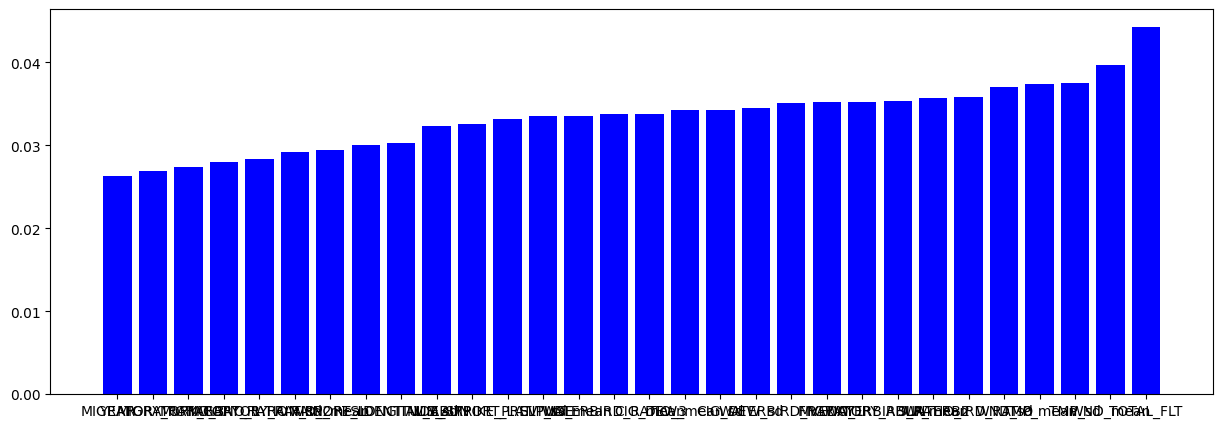

In [ ]:
importance = rf_model_final.feature_importances_
columns = X_train.columns
indices = np.argsort(importance)
plt.figure(figsize=(15,5))
plt.bar(range(len(indices)), importance[indices], color='b', align='center')
plt.xticks(range(len(indices)), columns[indices])

# XGBoost & CatBoost & LightGBM

In [6]:
X_train = train_data.drop(["AIRPORT_ID", "RESPONSE", "RESPONSE_LOGIT", "NUM_STRIKE"], axis=1)
y_train = np.log1p(train_data["NUM_STRIKE"])
X_test = test_data.drop(["AIRPORT_ID", "RESPONSE", "RESPONSE_LOGIT", "NUM_STRIKE"], axis=1)
y_test = np.log1p(test_data["NUM_STRIKE"])

In [12]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

xgb= XGBRegressor()
xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.07,0.1,0.15, 0.2],
    'max_depth' : [3,5,7,10,15],
    'colsample_bytree' : [0.7,0.8,0.9]

}
xgb_grid=GridSearchCV(xgb, xgb_param_grid, scoring="neg_root_mean_squared_error", cv=5, verbose = 2)
xgb_grid.fit(X_train, y_train)

#best f1_macro 수치와 best parameter확인
print("best f1_macro : {0: .4f}".format(xgb_grid.best_score_)) # -0.4552
print("best param : ",xgb_grid.best_params_) # {'colsample_bytree': 0.9, 'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 100}

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=100; total time=   1.6s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=100; total time=   0.2s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=200; total time=   0.3s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END colsample_bytree=0

# Original classification data

In [ ]:
temp = pd.read_csv("/content/drive/MyDrive/DM_project/data_2009_2024_full_num_counts.csv", index_col=0)
temp.reset_index(drop=True, inplace=True)
temp.head()

,DATE,MONTH,YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT_LATITUDE,AIRPORT_LONGITUDE,SKY,PRECIPITATION,...,SPECIES_CHECKLISTS_1,SPECIES_CHECKLISTS_2,SPECIES_CHECKLISTS_3,SPECIES_CHECKLISTS_4,SPECIES_CHECKLISTS_5,SPECIES_OBSERVERS_1,SPECIES_OBSERVERS_2,SPECIES_OBSERVERS_3,SPECIES_OBSERVERS_4,SPECIES_OBSERVERS_5
0,2020-02-21,2,2020,06:49,Night,KSMF,38.69542,-121.59077,No Cloud,N,...,671,474,266,383,328,116,94,51,70,62
1,2015-11-10,11,2015,18:00,Night,KSMF,38.69542,-121.59077,No Cloud,N,...,132,158,179,121,84,31,38,25,19,24
2,2022-04-23,4,2022,18:51,Day,KLAX,33.94254,-118.40807,No Cloud,N,...,1009,784,722,1090,784,161,83,119,128,116
3,2022-05-17,5,2022,14:59,Day,KLAX,33.94254,-118.40807,No Cloud,N,...,1163,919,833,1231,807,195,131,162,161,116
4,2023-04-20,4,2023,06:17,Dawn,KSFO,37.61900,-122.37484,No Cloud,N,...,1254,1214,1360,928,778,305,251,197,197,175


In [ ]:
temp.columns

Index(['DATE', 'MONTH', 'YEAR', 'TIME', 'TIME_OF_DAY', 'AIRPORT_ID',
       'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE', 'SKY', 'PRECIPITATION',
       'WND_speed', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP', 'AA1', 'WND_gust',
       'is_variable_WND', 'WND_dir_sin', 'WND_dir_cos', 'INCIDENT',
       'NUM_UNIQUE_OBSERVER', 'NUM_MIGRATORY_SPECIES', 'NUM_MIGRATORY_COUNT',
       'NUM_RESIDENT_COUNT', 'NUM_WATERBIRD_COUNT', 'NUM_LANDBIRD_COUNT',
       'NUM_UNIQUE_OBSERVER_1', 'NUM_MIGRATORY_COUNT_1',
       'NUM_RESIDENT_COUNT_1', 'NUM_WATERBIRD_COUNT_1', 'NUM_LANDBIRD_COUNT_1',
       'NUM_UNIQUE_OBSERVER_2', 'NUM_MIGRATORY_COUNT_2',
       'NUM_RESIDENT_COUNT_2', 'NUM_WATERBIRD_COUNT_2', 'NUM_LANDBIRD_COUNT_2',
       'NUM_UNIQUE_OBSERVER_3', 'NUM_MIGRATORY_COUNT_3',
       'NUM_RESIDENT_COUNT_3', 'NUM_WATERBIRD_COUNT_3', 'NUM_LANDBIRD_COUNT_3',
       'FLOCKING_CHECKLISTS_1', 'FLOCKING_CHECKLISTS_2',
       'FLOCKING_CHECKLISTS_3', 'FLOCKING_CHECKLISTS_4',
       'FLOCKING_CHECKLISTS_5', 'FLOCKIN

In [ ]:
temp["INCIDENT"].value_counts()

,count
INCIDENT,
0,54749
1,5435


In [ ]:
temp.columns

Index(['MONTH', 'YEAR', 'TIME_OF_DAY', 'AIRPORT_LATITUDE', 'AIRPORT_LONGITUDE',
       'SKY', 'PRECIPITATION', 'WND_speed', 'CIG', 'VIS', 'TMP', 'DEW', 'SLP',
       'AA1', 'WND_gust', 'is_variable_WND', 'WND_dir_sin', 'WND_dir_cos',
       'INCIDENT', 'NUM_UNIQUE_OBSERVER', 'NUM_MIGRATORY_SPECIES',
       'NUM_MIGRATORY_COUNT', 'NUM_RESIDENT_COUNT', 'NUM_WATERBIRD_COUNT',
       'NUM_LANDBIRD_COUNT', 'NUM_UNIQUE_OBSERVER_1', 'NUM_MIGRATORY_COUNT_1',
       'NUM_RESIDENT_COUNT_1', 'NUM_WATERBIRD_COUNT_1', 'NUM_LANDBIRD_COUNT_1',
       'NUM_UNIQUE_OBSERVER_2', 'NUM_MIGRATORY_COUNT_2',
       'NUM_RESIDENT_COUNT_2', 'NUM_WATERBIRD_COUNT_2', 'NUM_LANDBIRD_COUNT_2',
       'NUM_UNIQUE_OBSERVER_3', 'NUM_MIGRATORY_COUNT_3',
       'NUM_RESIDENT_COUNT_3', 'NUM_WATERBIRD_COUNT_3', 'NUM_LANDBIRD_COUNT_3',
       'FLOCKING_CHECKLISTS_1', 'FLOCKING_CHECKLISTS_2',
       'FLOCKING_CHECKLISTS_3', 'FLOCKING_CHECKLISTS_4',
       'FLOCKING_CHECKLISTS_5', 'FLOCKING_OBSERVERS_1', 'FLOCKING_OBSERVERS_2

In [ ]:
temp = temp.drop(["AIRPORT_ID", "DATE", "TIME"], axis=1)
temp = temp.fillna(0)
temp_train = temp[temp["YEAR"]<=2021]
temp_test = temp[temp["YEAR"]>2021]
X_train = temp_train.drop(["INCIDENT"], axis=1)
y_train = temp_train["INCIDENT"]
X_test = temp_test.drop(["INCIDENT"], axis=1)
y_test = temp_test["INCIDENT"]
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=2025, categorical_features=[2, 5, 6, 15])
X_train_smotenc, y_train_smotenc = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_smotenc = pd.get_dummies(X_train_smotenc)
X_test = pd.get_dummies(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=2025)
rf_model.fit(X_train_smotenc, y_train_smotenc)

y_hat = rf_model.predict(X_test)
print(accuracy_score(y_test, y_hat))

0.8909075825452132


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score
print(confusion_matrix(y_test, y_hat))
print(roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

[[10525   183]
 [ 1132   214]]
0.7029440084790308


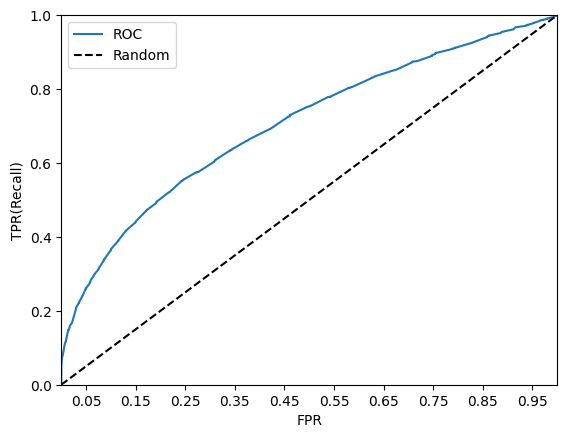

In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    plt.plot(fprs, tprs, label='ROC')   #ROC곡선 그리기
    plt.plot([0, 1], [0, 1], 'k--', label='Random')  #가운데 직선 그리기

    #FPR x축의 scale을 0.1단위로 변경, 축 이름 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR')
    plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, rf_model.predict_proba(X_test)[:, 1])

In [ ]:
rf_model.feature_importances_

array([1.40269090e-02, 4.03645780e-03, 7.61378528e-02, 7.29971730e-02,
       6.01927479e-02, 2.65351987e-02, 1.54521269e-02, 3.15601583e-02,
       3.22542381e-02, 2.88779675e-02, 8.72910502e-03, 4.94356481e-03,
       8.60408921e-02, 7.35675645e-02, 1.76271143e-02, 2.08860397e-02,
       2.11981903e-02, 2.00568935e-02, 2.10920954e-02, 2.08692627e-02,
       8.24966378e-03, 1.02127471e-02, 8.76995059e-03, 1.04807251e-02,
       9.97423328e-03, 7.52693148e-03, 9.25042019e-03, 9.27892917e-03,
       9.10238580e-03, 9.81730578e-03, 6.90296450e-03, 8.57281509e-03,
       8.95894478e-03, 8.73651393e-03, 9.19056733e-03, 9.06856264e-03,
       7.85878492e-03, 7.32649657e-03, 7.08129495e-03, 6.47248962e-03,
       7.97097506e-03, 7.28663243e-03, 6.31212915e-03, 6.38780027e-03,
       5.43941620e-03, 1.03659277e-02, 9.86694107e-03, 8.45344967e-03,
       8.55646204e-03, 9.94955913e-03, 7.28070352e-03, 6.61634631e-03,
       6.88452282e-03, 6.92244756e-03, 6.95221854e-03, 1.11676893e-03,
      

# AVONET database

In [26]:
avonet_ebird = pd.read_excel("/content/drive/MyDrive/DM_project/ebird_samples/AVONET2_eBird.xlsx", sheet_name="AVONET2_eBird")
avonet_birdlife = pd.read_excel("/content/drive/MyDrive/DM_project/AVONET1_Birdlife.xlsx", sheet_name="AVONET1_BirdLife")
avonet_birdlife.head()

,Sequence,Species1,Family1,Order1,Avibase.ID1,Total.individuals,Female,Male,Unknown,Complete.measures,...,Habitat.Density,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle,Min.Latitude,Max.Latitude,Centroid.Latitude,Centroid.Longitude,Range.Size
0,3103.0,Accipiter albogularis,Accipitridae,Accipitriformes,AVIBASE-BBB59880,5,2,0,3,4,...,1,2.0,Carnivore,Vertivore,Insessorial,-11.73,-4.02,-8.15,158.49,37461.21
1,3090.0,Accipiter badius,Accipitridae,Accipitriformes,AVIBASE-1A0ECB6E,10,4,6,0,8,...,2,3.0,Carnivore,Vertivore,Insessorial,-29.47,46.39,8.23,44.98,22374973.00
2,3125.0,Accipiter bicolor,Accipitridae,Accipitriformes,AVIBASE-ADBE44E1,11,4,5,2,8,...,2,2.0,Carnivore,Vertivore,Generalist,-55.72,23.73,-10.10,-59.96,14309701.27
3,3116.0,Accipiter brachyurus,Accipitridae,Accipitriformes,AVIBASE-68BF920B,4,4,0,0,3,...,1,2.0,Carnivore,Vertivore,Insessorial,-6.31,-4.08,-5.45,150.68,35580.71
4,3092.0,Accipiter brevipes,Accipitridae,Accipitriformes,AVIBASE-8492E4B7,8,4,4,0,4,...,1,3.0,Carnivore,Vertivore,Generalist,31.19,55.86,45.24,45.33,2936751.80


In [28]:
avonet_ebird.columns

Index(['Species2', 'Family2', 'Order2', 'Avibase.ID2', 'Total.individuals',
       'Female', 'Male', 'Unknown', 'Complete.measures', 'Beak.Length_Culmen',
       'Beak.Length_Nares', 'Beak.Width', 'Beak.Depth', 'Tarsus.Length',
       'Wing.Length', 'Kipps.Distance', 'Secondary1', 'Hand-Wing.Index',
       'Tail.Length', 'Mass', 'Mass.Source', 'Mass.Refs.Other', 'Inference',
       'Traits.inferred', 'Reference.species', 'Habitat', 'Habitat.Density',
       'Migration', 'Trophic.Level', 'Trophic.Niche', 'Primary.Lifestyle'],
      dtype='object')

In [37]:
clustering_data = avonet_ebird.drop([ 'Family2', 'Order2', 'Avibase.ID2', 'Total.individuals',
       'Female', 'Male', 'Unknown', 'Complete.measures','Secondary1', 'Hand-Wing.Index','Mass.Source', 'Mass.Refs.Other', 'Inference',
       'Traits.inferred', 'Reference.species', 'Habitat.Density', 'Trophic.Niche'], axis=1)

centroid_latitude_by_species=dict(zip(avonet_birdlife["Species1"], avonet_birdlife["Centroid.Latitude"]))
centroid_longitude_by_species=dict(zip(avonet_birdlife["Species1"], avonet_birdlife["Centroid.Longitude"]))
range_size_by_species=dict(zip(avonet_birdlife["Species1"], avonet_birdlife["Range.Size"]))

clustering_data["Centroid.Latitude"] = clustering_data["Species2"].apply(lambda x: centroid_latitude_by_species.get(x, np.nan))
clustering_data["Centroid.Longitude"] = clustering_data["Species2"].apply(lambda x: centroid_longitude_by_species.get(x, np.nan))
clustering_data["Range.Size"] = clustering_data["Species2"].apply(lambda x: range_size_by_species.get(x, np.nan))

In [41]:
clustering_data.to_csv("avonet_clustering.csv")

In [40]:
clustering_data.shape

(10661, 17)

In [17]:
cols =['TAXONOMIC ORDER',
        'CATEGORY', 'SCIENTIFIC NAME', 'COMMON NAME', 'OBSERVATION COUNT',
        'OBSERVATION DATE', 'OBSERVER ID', 'DURATION MINUTES', 'EFFORT DISTANCE KM']
ksmf = pd.read_csv('/content/drive/MyDrive/DM_project/filtered_KSMF.txt', sep='\t', usecols=cols)
klax = pd.read_csv('/content/drive/MyDrive/DM_project/filtered_KLAX.txt', sep='\t', usecols=cols)
ksfo = pd.read_csv('/content/drive/MyDrive/DM_project/filtered_KSFO.txt', sep='\t', usecols=cols)
koak = pd.read_csv('/content/drive/MyDrive/DM_project/filtered_KOAK.txt', sep='\t', usecols=cols)
ksjc = pd.read_csv('/content/drive/MyDrive/DM_project/filtered_KSJC.txt', sep='\t', usecols=cols)
ksan = pd.read_csv('/content/drive/MyDrive/DM_project/filtered_KSAN.txt', sep='\t', usecols=cols)
ksna = pd.read_csv('/content/drive/MyDrive/DM_project/filtered_KSNA.txt', sep='\t', usecols=cols)

In [22]:
ksmf["COMMON NAME"].nunique()

485

In [24]:
fivedays_dict = dict(zip(list(range(1,366)), [i//5+1 if i%5!=0 else i//5 for i in range(1,366)]))
for df in [ksmf, klax, ksfo, koak, ksjc, ksan, ksna]:
  df["YEAR"] = pd.to_datetime(df["OBSERVATION DATE"]).dt.year
  df["MONTH"] = pd.to_datetime(df["OBSERVATION DATE"]).dt.month
  df["DAY_OF_YEAR"] = pd.to_datetime(df["OBSERVATION DATE"]).dt.dayofyear
  for year in [2000, 2004, 2008, 2012, 2016, 2020, 2024]:
    for month in range(3, 13):
      df.loc[(df["YEAR"]==year)&(df["MONTH"]==month), "DAY_OF_YEAR"] -= 1
  df["FIVEDAY"] = df["DAY_OF_YEAR"].apply(lambda x: fivedays_dict[x])

,TAXONOMIC ORDER,CATEGORY,COMMON NAME,SCIENTIFIC NAME,OBSERVATION COUNT,OBSERVATION DATE,OBSERVER ID,DURATION MINUTES,EFFORT DISTANCE KM,YEAR,MONTH,DAY_OF_YEAR,FIVEDAY
0,21333,species,American Crow,Corvus brachyrhynchos,30,2000-01-03,obsr20770,NaN,NaN,2000,1,3,1
1,32338,species,American Goldfinch,Spinus tristis,2,2000-01-03,obsr20770,NaN,NaN,2000,1,3,1
2,11913,species,American Kestrel,Falco sparverius,3,2000-01-03,obsr20770,NaN,NaN,2000,1,3,1
3,31605,species,American Pipit,Anthus rubescens,30,2000-01-03,obsr20770,NaN,NaN,2000,1,3,1
4,16831,species,Black Phoebe,Sayornis nigricans,2,2000-01-03,obsr20770,NaN,NaN,2000,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854798,33874,species,Yellow-rumped Warbler,Setophaga coronata,5,2024-12-12,obsr122782,220.0,17.703,2024,12,346,70
1854799,33874,species,Yellow-rumped Warbler,Setophaga coronata,5,2024-12-12,obsr422745,220.0,17.703,2024,12,346,70
1854800,33874,species,Yellow-rumped Warbler,Setophaga coronata,35,2024-12-01,obsr4453777,18.0,1.153,2024,12,335,67
1854801,33874,species,Yellow-rumped Warbler,Setophaga coronata,3,2024-12-10,obsr705235,86.0,2.656,2024,12,344,69


In [45]:
birds_unique = set(ksmf["SCIENTIFIC NAME"].tolist())
birds_unique.update(klax["SCIENTIFIC NAME"].tolist())
birds_unique.update(ksfo["SCIENTIFIC NAME"].tolist())
birds_unique.update(koak["SCIENTIFIC NAME"].tolist())
birds_unique.update(ksjc["SCIENTIFIC NAME"].tolist())
birds_unique.update(ksan["SCIENTIFIC NAME"].tolist())
birds_unique.update(ksna["SCIENTIFIC NAME"].tolist())

In [47]:
len(list(birds_unique))

903

In [ ]:
birds_unique

In [55]:
train_data.groupby(by=["AIRPORT_ID"])[["AIRPORT_LATITUDE", "AIRPORT_LONGITUDE"]].mean().to_dict()

{'AIRPORT_LATITUDE': {'KLAX': 33.94254,
  'KOAK': 37.72129,
  'KSAN': 32.73356,
  'KSFO': 37.619,
  'KSJC': 37.36186,
  'KSMF': 38.69542,
  'KSNA': 33.67566},
 'AIRPORT_LONGITUDE': {'KLAX': -118.40807,
  'KOAK': -122.22072,
  'KSAN': -117.18966,
  'KSFO': -122.37484,
  'KSJC': -121.92901,
  'KSMF': -121.59076999999999,
  'KSNA': -117.86822}}

In [ ]:
# KLAX, KSAN, KSNA
# KOAK, KSFO, KSJC, KSMF

ebird1 = pd.concat([ksmf, koak, ksfo, ksjc])
ebird2 = pd.concat([klax, ksan, ksna])
ebird2

In [66]:
ebird2.groupby(by="YEAR")["TAXONOMIC ORDER"].count()

,TAXONOMIC ORDER
YEAR,
2000,18269
2001,12813
2002,11466
2003,15960
2004,16235
2005,14775
2006,22983
2007,37335
2008,57662


In [67]:
ebird1 = ebird1[(ebird1["YEAR"]<=2021) & (ebird1["YEAR"]>=2019)]
ebird2 = ebird2[(ebird2["YEAR"]<=2021) & (ebird2["YEAR"]>=2019)]

In [68]:
unique_sp_1 = set(ebird1["SCIENTIFIC NAME"].tolist())
unique_sp_2 = set(ebird2["SCIENTIFIC NAME"].tolist())

In [77]:
ebird1["OBSERVATION COUNT"] = ebird1["OBSERVATION COUNT"].apply(lambda x: x if x!="X" else "1").astype(int)
ebird2["OBSERVATION COUNT"] = ebird2["OBSERVATION COUNT"].apply(lambda x: x if x!="X" else "1").astype(int)

<ipython-input-77-44368df98164>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebird1["OBSERVATION COUNT"] = ebird1["OBSERVATION COUNT"].apply(lambda x: x if x!="X" else "1").astype(int)


In [87]:
mean_count_ebird1 = ebird1.groupby(by=["SCIENTIFIC NAME", "FIVEDAY", "YEAR"])["OBSERVATION COUNT"].sum().groupby(by=["SCIENTIFIC NAME", "FIVEDAY"]).mean().to_dict()
mean_count_ebird2 = ebird2.groupby(by=["SCIENTIFIC NAME", "FIVEDAY", "YEAR"])["OBSERVATION COUNT"].sum().groupby(by=["SCIENTIFIC NAME", "FIVEDAY"]).mean().to_dict()

counts_by_species_1 = pd.DataFrame(columns=["SCIENTIFIC NAME"]+list(range(1, 74)))
counts_by_species_2 = pd.DataFrame(columns=["SCIENTIFIC NAME"]+list(range(1, 74)))

for sc_name in unique_sp_1:
  rowname = len(counts_by_species_1)
  counts_by_species_1.loc[rowname,"SCIENTIFIC NAME"] = sc_name
  for fiveday in range(1, 74):
    counts_by_species_1.loc[rowname,fiveday] = mean_count_ebird1.get((sc_name, fiveday), 0)

for sc_name in unique_sp_2:
  rowname = len(counts_by_species_2)
  counts_by_species_2.loc[rowname,"SCIENTIFIC NAME"] = sc_name
  for fiveday in range(1, 74):
    counts_by_species_2.loc[rowname,fiveday] = mean_count_ebird2.get((sc_name, fiveday), 0)

In [118]:
counts_by_species_1

,SCIENTIFIC NAME,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,cluster
0,Zosterops simplex,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Bucephala clangula/islandica,80.0,123.5,47.333333,90.0,127.0,4.0,42.5,1.0,63.666667,...,29.333333,21.0,43.5,5.0,53.5,54.0,30.0,24.5,7.333333,1
2,Uria aalge,1120.333333,1502.0,1323.0,830.666667,980.0,1464.666667,1517.0,2140.666667,900.0,...,53.0,777.666667,403.5,1258.0,1561.0,26.333333,573.5,172.0,194.0,3
3,Pavo cristatus,0,2.0,8.0,0,1.0,0,0,11.0,13.0,...,24.0,5.0,7.0,11.5,3.5,0,8.0,0,0,1
4,Phalaenoptilus nuttallii,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Chlidonias niger,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
583,Anser anser x cygnoides,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
584,Piranga rubra,7.0,4.5,11.5,10.0,8.0,14.0,4.0,8.0,10.0,...,1.0,3.0,3.0,1.0,1.0,0,1.0,8.0,0,1
585,Thalasseus maximus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=9, n_init=20, random_state=2025),
                 k=(1, 10))

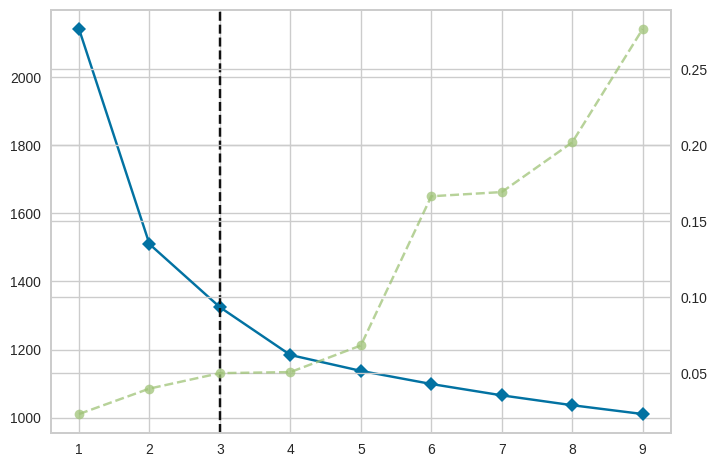

In [114]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
cluster1 = KMeans(random_state=2025, n_init=20)
visualizer = KElbowVisualizer(cluster1, k=(1,10))
visualizer.fit(MinMaxScaler().fit_transform(counts_by_species_1.drop(["SCIENTIFIC NAME", "cluster"], axis=1).T).T)

KElbowVisualizer(ax=<Axes: >,
                 estimator=KMeans(n_clusters=9, n_init=20, random_state=2025),
                 k=(1, 10))

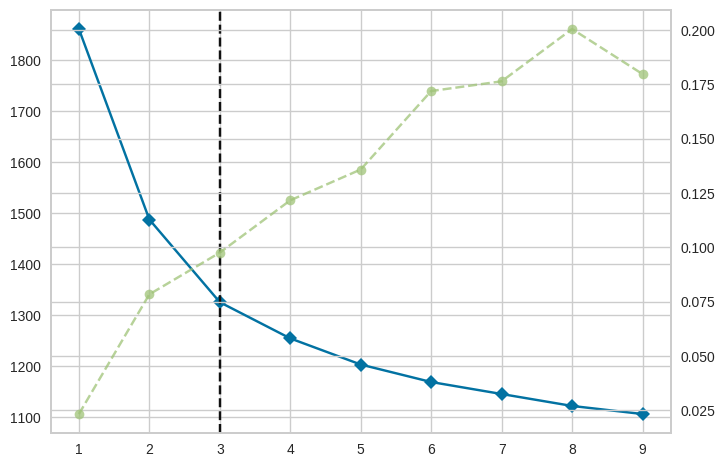

In [119]:
cluster2 = KMeans(random_state=2025, n_init=20)
visualizer = KElbowVisualizer(cluster2, k=(1,10))
visualizer.fit(MinMaxScaler().fit_transform(counts_by_species_2.drop(["SCIENTIFIC NAME", "cluster"], axis=1).T).T)

In [144]:
counts_by_species_1["cluster"] = KMeans(n_clusters=3, random_state=2025, n_init=20).fit_predict(MinMaxScaler().fit_transform(counts_by_species_1.drop(["SCIENTIFIC NAME", "cluster"], axis=1).T).T)
counts_by_species_2["cluster"] =  KMeans(n_clusters=3, random_state=2025, n_init=20).fit_predict(MinMaxScaler().fit_transform(counts_by_species_2.drop(["SCIENTIFIC NAME", "cluster"], axis=1).T).T)

In [145]:
counts_by_species_1["cluster"].value_counts()

,count
cluster,
2,334
0,165
1,88


In [152]:
counts_by_species_1[counts_by_species_1["cluster"]==0].tail(20)

,SCIENTIFIC NAME,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,cluster
532,Melanerpes formicivorus,436.333333,246.333333,302.666667,335.333333,251.333333,361.0,329.0,361.666667,428.333333,...,368.333333,289.333333,286.333333,318.0,352.666667,326.333333,687.666667,292.666667,328.666667,0
533,Passerculus sandwichensis,1677.333333,817.333333,1111.333333,691.666667,813.666667,692.666667,713.333333,630.666667,545.0,...,1415.333333,1099.0,1017.666667,1168.333333,1273.666667,1017.0,1576.333333,950.333333,939.0,0
534,Pica nuttalli,123.0,85.0,59.666667,51.333333,91.666667,35.666667,83.666667,42.0,37.333333,...,57.666667,16.333333,17.333333,210.666667,68.666667,24.666667,148.333333,143.333333,73.0,0
535,Icteridae sp.,5676.333333,1063.0,1728.666667,774.666667,4450.0,2014.333333,1009.666667,719.333333,2138.0,...,10768.0,12937.333333,1875.0,4929.333333,6510.0,2288.0,8342.0,4049.0,6991.0,0
543,Larus sp.,3960.333333,3688.666667,2992.333333,2219.333333,2459.333333,2452.0,1282.333333,9590.0,1124.333333,...,1604.0,1638.0,2641.666667,2560.666667,1228.333333,1181.666667,4588.0,1282.666667,3406.333333,0
545,Larus brachyrhynchus,1284.333333,1279.666667,1740.333333,1305.666667,1038.0,1134.0,1306.0,1297.0,2351.666667,...,700.333333,949.333333,1137.333333,833.666667,621.333333,854.666667,2850.333333,1154.0,3419.666667,0
549,Aquila chrysaetos,34.0,13.333333,12.0,18.666667,8.5,10.0,10.0,14.666667,7.0,...,11.333333,14.333333,18.666667,12.333333,43.333333,22.666667,23.666667,7.666667,9.0,0
554,Actitis macularius,181.0,122.666667,214.666667,111.666667,135.666667,93.333333,174.0,142.333333,114.333333,...,155.666667,139.0,136.666667,163.0,161.333333,148.666667,221.0,102.0,279.666667,0
556,Anas crecca,14852.666667,7445.0,9739.666667,7794.333333,9922.0,5866.333333,5811.666667,4960.333333,4532.333333,...,5353.333333,2557.666667,5724.333333,4762.0,5351.0,5779.0,11599.0,9330.0,5382.0,0
559,Arenaria melanocephala,431.666667,379.333333,495.666667,276.0,434.666667,379.333333,800.0,290.333333,246.333333,...,550.666667,392.666667,411.666667,704.666667,465.333333,350.0,635.666667,335.666667,586.333333,0


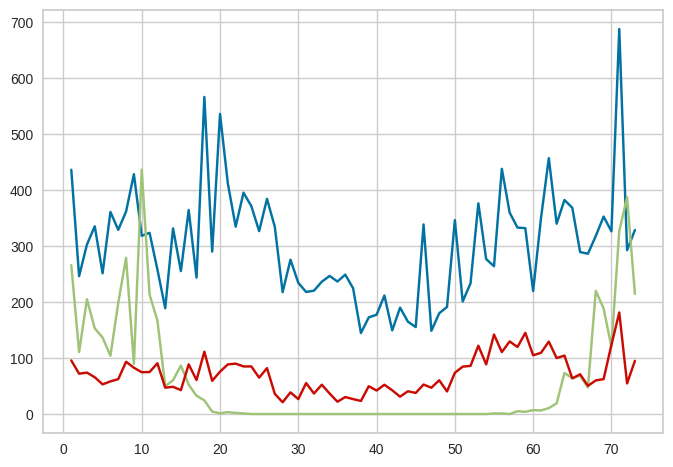

In [155]:
import matplotlib.pyplot as plt

plt.plot(list(range(1,74)),counts_by_species_1[counts_by_species_1["cluster"]==0].loc[532, list(range(1, 74))])
plt.plot(list(range(1,74)),counts_by_species_1[counts_by_species_1["cluster"]==0].loc[568, list(range(1, 74))])
plt.plot(list(range(1,74)),counts_by_species_1[counts_by_species_1["cluster"]==0].loc[579, list(range(1, 74))])


In [156]:
counts_by_species_1.to_csv("bird_cluster_KOAK_KSFO_KSJC_KSMF.csv")
counts_by_species_2.to_csv("bird_cluster_KLAX_KSNA_KSAN.csv")